In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [20]:
image = cv2.imread('image-output/test7_extracted.jpg', cv2.IMREAD_GRAYSCALE)
#image = cv2.GaussianBlur(image, (3,3), 0)

Show the original parchment

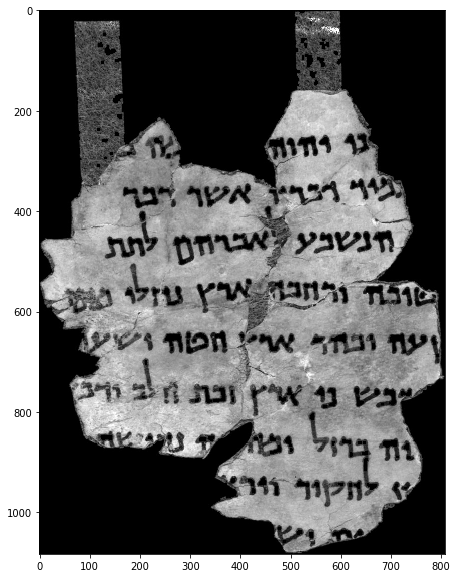

In [21]:
plt.figure(figsize = (500,10))
plt.imshow(image, cmap='gray', aspect = 1)
plt.show()

Binarize and smooth the parchment

In [38]:
_, image_bin = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#image_bin = cv2.GaussianBlur(image_bin, (9,9), 0)
image_bin = cv2.medianBlur(image_bin, 5)

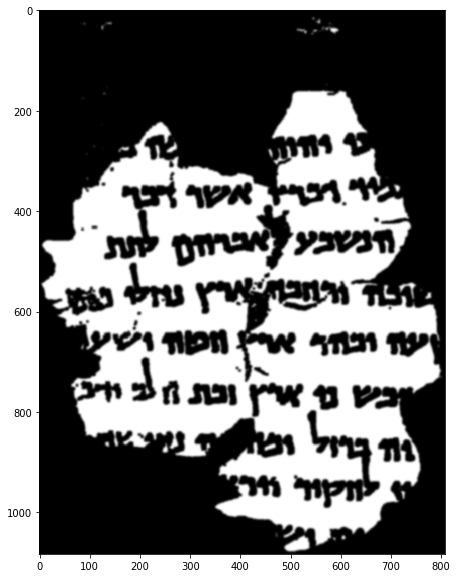

In [39]:
plt.figure(figsize = (500,10))
plt.imshow(image_bin, cmap='gray', aspect = 1)
plt.show()

Load a test template

In [6]:
template = cv2.imread('het.png', cv2.IMREAD_GRAYSCALE)
template = 255 - template
template = cv2.resize(template, (50,50))


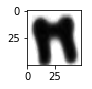

In [7]:
plt.figure(figsize = (500,1))
plt.imshow(template, cmap='gray', aspect = 1)
plt.show()

In [8]:
res = cv2.matchTemplate(image_bin,template,cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
max_loc

(463, 505)

Show the area of maximum correlation between the template and the parchment image as a rectangle

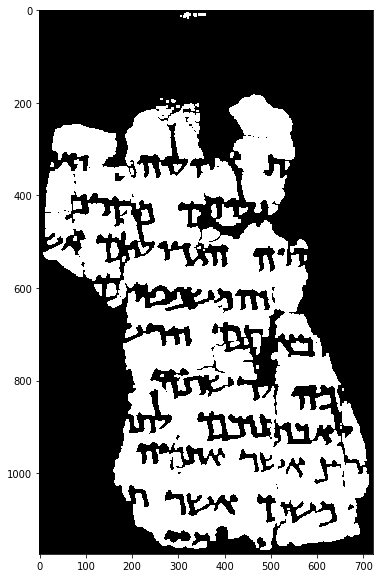

In [9]:
#cv2.rectangle(image_bin,(max_loc[1],max_loc[0]),(max_loc[1] + 50 ,max_loc[0] + 50),(0,255,0),3)
plt.figure(figsize = (500,10))
plt.imshow(image_bin, cmap='gray', aspect = 1)
plt.show()

Plot the found region

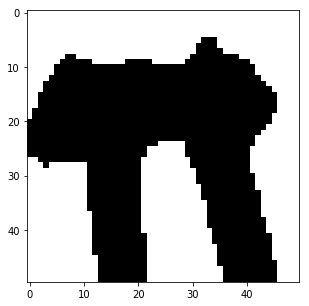

In [10]:
plt.figure(figsize = (500,5))
character = image_bin[max_loc[1]:max_loc[1] + 50, max_loc[0]:max_loc[0] + 50]
plt.imshow(character, cmap='gray', aspect = 1)
plt.show()

Compute connected components for the binary image, to hopefully extract characters

In [11]:
image_bin = 255 - image_bin
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image_bin, 8, cv2.CV_32S)
image_bin = 255 - image_bin

In [12]:
n_labels

71

Select components that are not too small and not too big

In [13]:
index = 20
good_components = []
for i in range(n_labels):
    if(stats[i][4] > 800 and stats[i][4] < 5000):
        good_components.append(stats[i])
          


Plot the found components which match the template (enough)

13


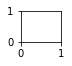

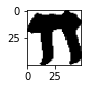

Correlation: 0.7024985626073001


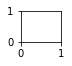

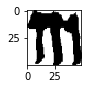

Correlation: 0.7162572447968868


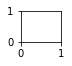

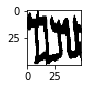

Correlation: 0.70293962768832


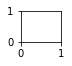

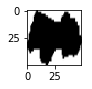

Correlation: 0.7403755720294062


In [14]:
nrows = int(len(good_components) / 2)
ncols = len(good_components) - int(len(good_components) / 2)
print(len(good_components))

temp_w, temp_h = template.shape
matches = []
for i in range(len(good_components)):
    x = good_components[i][0]
    y = good_components[i][1]
    width = good_components[i][2]
    height = good_components[i][3]
    
    im = image_bin[y:y+height, x:x+width]
    im = cv2.resize(im, (temp_w, temp_h))
      
    im_hist =  cv2.calcHist([im],[0],None,[256],[0,256])
    temp_hist = cv2.calcHist([template],[0],None,[256],[0,256])
   
    
    corr = cv2.compareHist(im_hist, temp_hist, method=cv2.TM_CCORR_NORMED)
    if(corr > 0.7): 
        plt.subplot(nrows,ncols, i+1)
        plt.figure(figsize = (500,1))
        plt.imshow(im, cmap='gray', aspect = 1)
        plt.show()
        print("Correlation:", corr)
        matches.append(i)
    


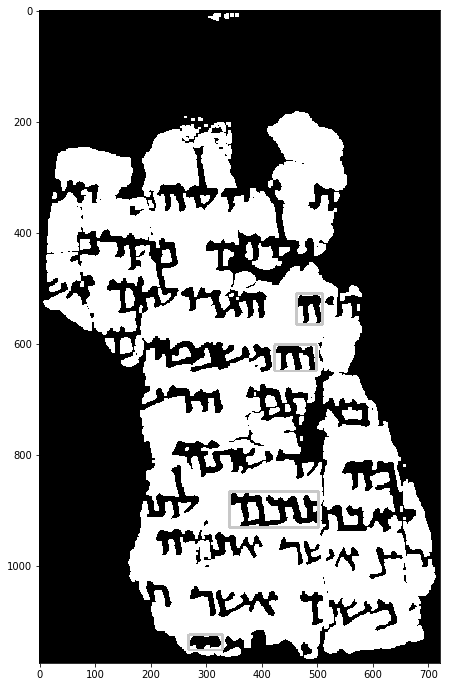

In [15]:
for match in matches:
    x = good_components[match][0]
    y = good_components[match][1]
    width = good_components[match][2]
    height = good_components[match][3]
    image_bin = cv2.rectangle(image_bin,(x,y),(x + width,y + height),(200,200,200),3)

plt.figure(figsize = (500,12))
plt.imshow(image_bin, cmap='gray', aspect = 1)
plt.show()